# Сергей Зотов AIN-2-22 Лабораторная работа №7

## Примеры

### Моделирование тем и кластеризация документов

Метод, который часто применяется к текстовым данным – моделирование тем (topic modeling).
Моделирование тем – это зонтичный термин, описывающий процедуру присвоения каждому документу одной или нескольких тем, которая осуществляется, как правило, без учителя.


### Латентное размещение Дирихле

Модель LDA пытается найти группы слов (темы или топики), которые часто появляются вместе. LDA также подразумевает, что каждый документ можно интерпретировать как «смесь» из нескольких тем.

In [2]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer для преобразования текстов в числовые данные
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [4]:
# LatentDirichletAllocation для анализа тем
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch", max_iter=10, random_state=0)

In [5]:
# Обучение модели и преобразование данных
document_topics = lda.fit_transform(X)

In [6]:
# Проверяем размерность components_
lda.components_.shape  # (10, 10000)

(10, 10000)

In [11]:
import numpy as np

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Получаем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names_out())

In [12]:
# Выводим 10 тем с помощью инструмента mglearn
import mglearn
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
action        saw           horror        horror        musical       
fight         book          house         pretty        comedy        
john          didn          dead          funny         song          
war           years         blood         comedy        music         
hero          now           killer        lot           funny         
western       kids          girl          fun           allen         
battle        10            around        quite         dance         
down          old           night         though        songs         
star          thought       gets          bit           tom           
lee           again         woman         isn           version       


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
fami

In [17]:
lda100 = LatentDirichletAllocation(
    n_components=100,
    learning_method="batch",
    max_iter=10,
    random_state=0
)
document_topics100 = lda100.fit_transform(X)

In [14]:
import numpy as np

topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])

sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

mglearn.tools.print_topics(
    topics=topics,
    feature_names=feature_names,
    sorting=sorting,
    topics_per_chunk=7,
    n_words=20
)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
cagney        crime         anderson      joe           moore         van           horror        
role          cop           new           rock          godzilla      dennis        scary         
flynn         noir          prince        band          oil           ninja         creepy        
plays         police        russell       bugs          michael       quaid         slasher       
young         city          york          short         doc           damme         gore          
douglas       detective     cinderella    shorts        america       fight         ghost         
performance   criminal      kurt          music         john          wilson        house         
cast          boss          hudson        larry         bush          action        dark          
played    

In [15]:
# Сортируем документы по весу темы 45 "музыка"
music = np.argsort(document_topics100[:, 45])[::-1]

# Печатаем 10 документов, в которых данная тема является наиболее важной
for i in music[:10]:
    # Выводим первые два предложения
    print(b". ".join(text_train[i].split(b".")[:2]) + b".\n")

b"It's not the best Columbo movie out of the series but it's just as good and perfectly watchable as most other Columbo series from the long running series of fine movies. <br /><br />The movie features some very long sequences, of which some are really too long.\n"
b'The Columbo formula was thrown out the window here.  Unfortunately, so was the pacing.\n'
b"This is the Columbo that got directed by Steven Spielberg at an early point in his career.  It's nothing sensational but some small hint of great things to come for Spielberg can be seen in this movie.\n"
b"This departure from the basic Columbo script works out well, for once.  For reasons not revealed here, Columbo's singular murder suspect has to be dropped from consideration.\n"
b'This was the first regular filmed Columbo movie episode but yet it aired as the second, after Steven Spielberg\'s "Columbo: Murder by the Book".  It\'s also at the same time among one of the better ones!<br /><br />Bernard L.\n'
b"It's nice that the mo

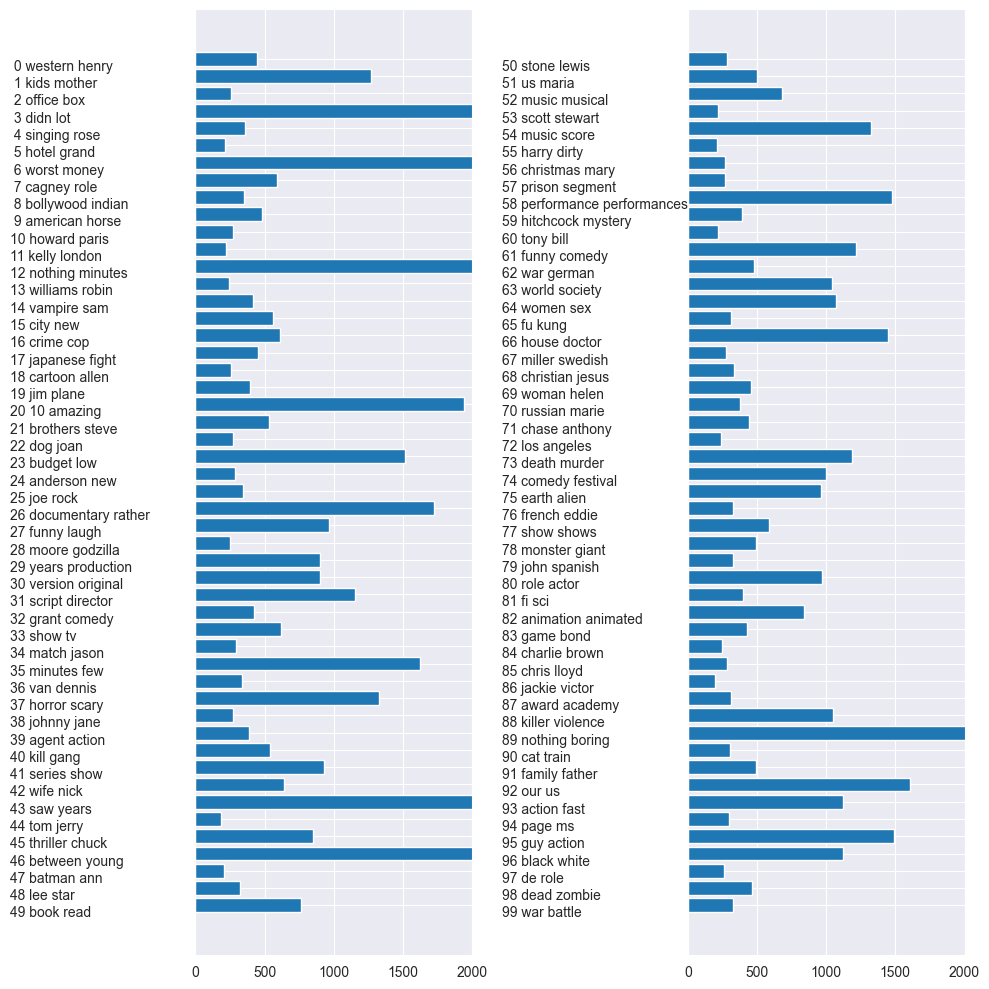

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ['{:>2} '.format(i) + ' '.join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]

# Построение столбцовых диаграмм
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(
        np.arange(50),
        np.sum(document_topics100, axis=0)[start:end],
        align='center'
    )
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)

plt.tight_layout()

# Задание

2)	Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным.
3)	Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»
4)	Масштабируйте данные с помощью tf-idf
5)	Использовать n-gram (1, 2, 3), pipeline(vectorizer, regressor) - ??? Добавить
6)	Исследуйте коэффициенты модели


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

# мешок слов
reviews = [
    "Этот фильм просто великолепен, рекомендую к просмотру.",
    "Очень плохое качество товара, не рекомендую.",
    "Обслуживание на высшем уровне, остался доволен.",
    "Товар не соответствует описанию.",
    "Книга читается легко, советую!",
    "Доставка задержалась, пришлось долго ждать.",
    "Отличный отель, сервис и качество превосходные.",
    "Очень разочарован покупкой, не стоит своих денег.",
    "Превосходная камера, фотографии получаются потрясающими.",
    "Фильм не понравился.",
    "Удобный и практичный товар, использую каждый день.",
    "Не рекомендую, товар пришел поврежденным.",
    "Книга вдохновляет, советую всем к прочтению.",
    "Качество обслуживания оставляет желать лучшего.",
    "Замечательный телефон, цена оправдана.",
    "Разочарован, цвет товара не соответствует картинке.",
    "Доставка быстрая, упаковка на высшем уровне.",
    "Фильм оказался шедевром, один из лучших.",
    "Отвратительный сервис, больше сюда не приду.",
    "Очень рад покупкой, рекомендую."
]

# разделение данных на обучающую и тестовую выборки
text_train, text_test = train_test_split(reviews, test_size=0.2, random_state=42)

# TF-IDF векторизатор
tfidf_vectorizer = TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(1, 3))

# преобразование данных
X_train_tfidf = tfidf_vectorizer.fit_transform(text_train)
X_test_tfidf = tfidf_vectorizer.transform(text_test)

print("\nTF-IDF представление данных (первые 5 строк):")
print(pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).head())

# pipeline с векторизатором и регрессором
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words=russian_stopwords, ngram_range=(1, 3))),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# создание меток для классификации (положительные/отрицательные отзывы)
labels = [1 if "рекомендую" in review or "доволен" in review else 0 for review in reviews]

text_train, text_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# обучение модели через pipeline
pipeline.fit(text_train, y_train)

y_pred = pipeline.predict(text_test)

# исследование коэф модели
vectorizer = pipeline.named_steps['vectorizer']
classifier = pipeline.named_steps['classifier']

# извлечение коэффициентов и ключевых слов
coefficients = pd.DataFrame({
    'term': vectorizer.get_feature_names_out(),
    'coefficient': classifier.coef_[0]
}).sort_values(by='coefficient', ascending=False)


print("\nКлючевые слова с наибольшими положительными коэффициентами:")
print(coefficients.head(10))

print("\nКлючевые слова с наибольшими отрицательными коэффициентами:")
print(coefficients.tail(10))


# оценка модели
print("\nОценка точности модели:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


TF-IDF представление данных (первые 5 строк):
   быстрая  быстрая упаковка  быстрая упаковка высшем  вдохновляет  \
0      0.0               0.0                      0.0          0.0   
1      0.0               0.0                      0.0          0.0   
2      0.0               0.0                      0.0          0.0   
3      0.0               0.0                      0.0          0.0   
4      0.0               0.0                      0.0          0.0   

   вдохновляет советую  вдохновляет советую всем  всем  всем прочтению  \
0                  0.0                       0.0   0.0             0.0   
1                  0.0                       0.0   0.0             0.0   
2                  0.0                       0.0   0.0             0.0   
3                  0.0                       0.0   0.0             0.0   
4                  0.0                       0.0   0.0             0.0   

   высшем  высшем уровне  ...  фильм  фильм понравился  фотографии  \
0     0.0        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sergey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sergey\PycharmProjects\BigData\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and be

## Вывод

В результате работы было проведено обучение модели для анализа текстовых отзывов с использованием методов обработки текста. Данные преобразованы с помощью TF-IDF, а также учтены биграммы и триграммы, что позволило учитывать последовательности слов. Удаление стоп-слов улучшило качество признаков, сосредоточив внимание на ключевых терминах.

Была создана классификационная модель на основе логистической регрессии, которая показывала, какие слова сильнее всего влияют на предсказания. Например, слова "рекомендую" и "очень рад" сигнализировали о положительных отзывах, а "разочарован" или "не соответствует" — об отрицательных. Точность модели составила 50%, что указывает на необходимость доработки, например, добавления данных или использования более сложных методов, таких как нейронные сети.

В целом, работа показала важность текстовой предобработки (TF-IDF, n-grams, удаление стоп-слов) и дала представление о том, как анализировать текстовые данные и выявлять закономерности в отзывах.